In [43]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import datetime
from  sklearn.decomposition import PCA
from sklearn import preprocessing
from scipy import stats
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LinearRegression,Lasso
%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


/home/ashwin/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['var', 'test', 'plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
train=pd.read_csv('/home/ashwin/Downloads/SAG/bike sharing/train.csv')
test=pd.read_csv('/home/ashwin/Downloads/SAG/bike sharing/test.csv')

In [3]:
print(train.head())
print(train.shape)
print(test.head())
print(test.shape)

              datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1  
(10886, 12)
              datetime  season  holiday  workingday  weather   temp   atemp  \
0  2011-01-20 00:00:00       1        0           1        1  10.66  11.365   
1  2011-01-20 01:00:00       1        0          

In [4]:
list(train)

['datetime',
 'season',
 'holiday',
 'workingday',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'casual',
 'registered',
 'count']

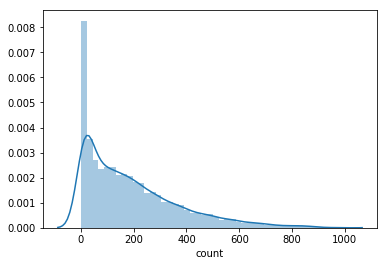

In [5]:
sns.distplot(train['count'])

In [6]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [7]:
print(train.shape)
print(test.shape)

(10886, 12)
(6493, 9)


In [8]:
print(list(train))
print(list(test))

In [9]:
target=train['count']
train=train.drop('count',axis=1)
train=train.drop('casual',axis=1)
train=train.drop('registered',axis=1)
combain_data=train.append(test)
print(combain_data.shape)
print(combain_data.describe())

(17379, 9)
             season       holiday    workingday       weather          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       2.501640      0.028770      0.682721      1.425283     20.376474   
std        1.106918      0.167165      0.465431      0.639357      7.894801   
min        1.000000      0.000000      0.000000      1.000000      0.820000   
25%        2.000000      0.000000      0.000000      1.000000     13.940000   
50%        3.000000      0.000000      1.000000      1.000000     20.500000   
75%        3.000000      0.000000      1.000000      2.000000     27.060000   
max        4.000000      1.000000      1.000000      4.000000     41.000000   

              atemp      humidity     windspeed  
count  17379.000000  17379.000000  17379.000000  
mean      23.788755     62.722884     12.736540  
std        8.592511     19.292983      8.196795  
min        0.000000      0.000000      0.000000  
25%       16.665000     48.

In [10]:
combain_data.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
dtype: object

In [11]:
combain_data['season'].value_counts()

3    4496
2    4409
1    4242
4    4232
Name: season, dtype: int64

In [12]:
combain_data['holiday'].value_counts()

0    16879
1      500
Name: holiday, dtype: int64

In [13]:
combain_data['workingday'].value_counts()

1    11865
0     5514
Name: workingday, dtype: int64

In [14]:
combain_data['weather'].value_counts()

1    11413
2     4544
3     1419
4        3
Name: weather, dtype: int64

In [15]:
combain_data['humidity'].value_counts()

88     657
83     630
94     560
87     488
70     430
66     388
65     387
69     359
55     352
74     341
77     336
61     336
93     331
49     327
78     327
62     325
73     317
46     316
52     312
56     310
82     299
41     290
54     287
81     275
59     272
100    270
43     270
60     267
53     267
50     266
      ... 
80     107
29     106
32      99
28      97
26      78
86      76
27      71
25      59
24      56
23      46
22      27
21      26
0       22
20      17
19      16
18      10
16      10
17      10
90       7
85       5
15       4
96       3
14       2
92       2
13       1
12       1
91       1
10       1
97       1
8        1
Name: humidity, Length: 89, dtype: int64

In [16]:
combain_data['datetime']=combain_data['datetime'].astype('str')
combain_data['humidity']=combain_data['humidity'].astype('float64')

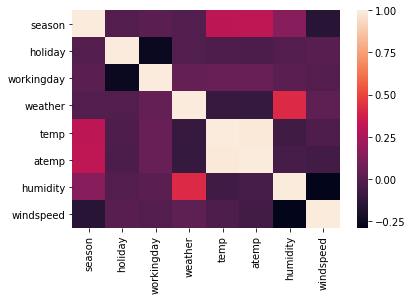

In [17]:



corr = combain_data.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

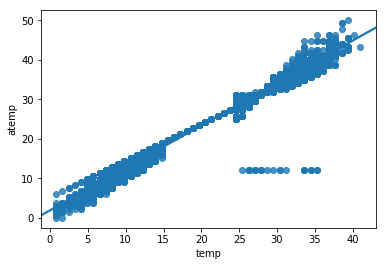

In [19]:
sns.regplot(x=combain_data['temp'], y=combain_data['atemp'], data=combain_data)

In [20]:
combain_data=combain_data.drop('temp',axis=1)

In [21]:
numerical_var=[f for f in combain_data.columns if combain_data.dtypes[f] 
        == 'float64']
catagorical_var=[f for f in combain_data.columns if combain_data.dtypes[f] 
                 == 'int64']

In [22]:
for var in numerical_var:
        print(var)
        print(stats.skew(combain_data[var]))

atemp
-0.09042105336080851
humidity
-0.11127754382268666
windspeed
0.5748555816221614


In [23]:
scaler = preprocessing.StandardScaler()
for var in numerical_var:
    combain_data[var] = scaler.fit_transform(combain_data[[var]])


In [24]:
dummified_data=pd.get_dummies(combain_data[catagorical_var].astype('str'))
dummified_data.shape

(17379, 12)

In [25]:
combain_data=combain_data.drop(catagorical_var,axis=1)

In [26]:
frame=[dummified_data,combain_data]
combain_data=pd.concat(frame,axis=1)
combain_data.shape

(17379, 16)

In [27]:
list(combain_data)

['season_1',
 'season_2',
 'season_3',
 'season_4',
 'holiday_0',
 'holiday_1',
 'workingday_0',
 'workingday_1',
 'weather_1',
 'weather_2',
 'weather_3',
 'weather_4',
 'datetime',
 'atemp',
 'humidity',
 'windspeed']

In [28]:
combain_data['datetime']=combain_data['datetime'].astype('str')

In [29]:
combain_data['datetime'][0]

0    2011-01-01 00:00:00
0    2011-01-20 00:00:00
Name: datetime, dtype: object

In [30]:
a='2011-01-01 00:00:00'
a.split()[1]

'00:00:00'

In [31]:
combain_data['hour']=combain_data['datetime']\
    .apply(lambda x:x.split()[1])
combain_data['datetime']=combain_data['datetime']\
    .apply(lambda x:x.split()[0])
combain_data['hour']=combain_data['hour']\
    .apply(lambda x:x.split(':')[0])

In [32]:
combain_data['datetime']=pd.to_datetime(combain_data['datetime'])
combain_data['year'] = combain_data['datetime'].dt.year
combain_data['month'] = combain_data['datetime'].dt.month
combain_data['day'] = combain_data['datetime'].dt.day

In [33]:
combain_data=combain_data.drop('datetime',axis=1)

In [34]:
dummified_data=pd.get_dummies(combain_data[['year','month','day']].astype('str'))

In [35]:
combain_data=combain_data.drop(['year','month','day'],axis=1)

In [36]:
frame=[combain_data,dummified_data]
combain_data=pd.concat(frame,axis=1)
combain_data['hour']=combain_data['hour'].astype('int64')

In [37]:
train=combain_data[:10886]
test=combain_data[10886:]

In [ ]:
regr = LinearRegression( normalize=True)
regr.fit(train,target)
predictions=regr.predict(test)
submission=pd.DataFrame()
submission['count']=predictions
submission.to_csv('/home/ashwin/Downloads/SAG/bike sharing/submissionleniar.csv'
                  ,index=True)

In [67]:
lasso_mod=Lasso(normalize=True)
parameters = {'alpha':[0.0001,0.001,0.01,0.1,1,5,10,20]}
lasso_reg = GridSearchCV(lasso_mod, parameters, n_jobs=-1,  
                   scoring='r2',cv=10,
                 refit=True)
lasso_reg.fit(train,target)
predictions=lasso_reg.predict(test)
ubmission=pd.DataFrame()
submission['count']=predictions
submission.to_csv('/home/ashwin/Downloads/SAG/bike sharing/submissionlasso.csv'
                  ,index=True)

/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
